Inciso a)

In [16]:
from google.colab import drive
drive.mount("/content/Drive")

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [5]:
import pandas as pd
df = pd.read_csv("/content/Drive/MyDrive/datos/gym_members_exercise_tracking.csv")
def calcular_cuartiles_y_percentiles(df):
    resultados = {}
    for columna in df.columns:
        if df[columna].dtype in ['float64', 'int64']:

            valores_ordenados = sorted(df[columna].dropna())

            n = len(valores_ordenados)
            if n > 0:

                Q1 = valores_ordenados[int(n * 0.25)]
                Q2 = valores_ordenados[int(n * 0.5)]
                Q3 = valores_ordenados[int(n * 0.75)]


                P90 = valores_ordenados[int(n * 0.9)]

                resultados[columna] = (Q1, Q2, Q3, P90)

    return resultados

# Calcular y mostrar resultados
resultados = calcular_cuartiles_y_percentiles(df)
for key, value in resultados.items():
    print(f"{key} - Q1: {value[0]}, Q2: {value[1]}, Q3: {value[2]}, Percentil 90: {value[3]}")

Age - Q1: 28, Q2: 40, Q3: 49, Percentil 90: 55
Weight (kg) - Q1: 58.1, Q2: 70.0, Q3: 86.0, Percentil 90: 107.2
Height (m) - Q1: 1.62, Q2: 1.71, Q3: 1.8, Percentil 90: 1.92
Max_BPM - Q1: 170, Q2: 180, Q3: 190, Percentil 90: 196
Avg_BPM - Q1: 131, Q2: 143, Q3: 156, Percentil 90: 164
Resting_BPM - Q1: 56, Q2: 62, Q3: 68, Percentil 90: 72
Session_Duration (hours) - Q1: 1.04, Q2: 1.26, Q3: 1.46, Percentil 90: 1.76
Calories_Burned - Q1: 720.0, Q2: 893.0, Q3: 1076.0, Percentil 90: 1265.0
Fat_Percentage - Q1: 21.3, Q2: 26.2, Q3: 29.3, Percentil 90: 32.6
Water_Intake (liters) - Q1: 2.2, Q2: 2.6, Q3: 3.1, Percentil 90: 3.5
Workout_Frequency (days/week) - Q1: 3, Q2: 3, Q3: 4, Percentil 90: 5
Experience_Level - Q1: 1, Q2: 2, Q3: 2, Percentil 90: 3
BMI - Q1: 20.11, Q2: 24.16, Q3: 28.56, Percentil 90: 33.5


Se aplica la distribucion normal, ya que vemos que los datos sigue una distribucion simetrica, como e


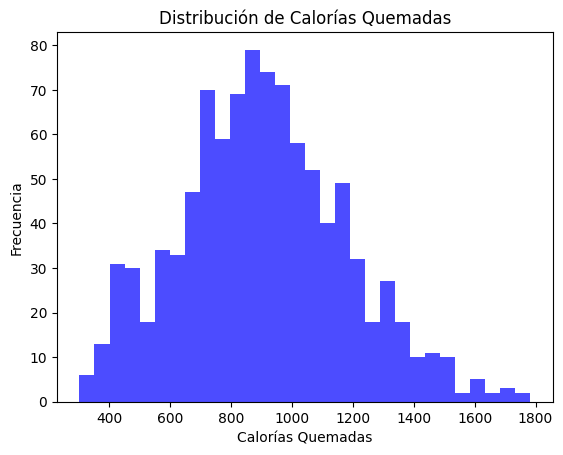

In [7]:
import matplotlib.pyplot as plt

# Graficar histograma de una columna como "Calories_Burned"
valores = df['Calories_Burned'].dropna().tolist()
plt.hist(valores, bins=30, color='blue', alpha=0.7)
plt.title('Distribución de Calorías Quemadas')
plt.xlabel('Calorías Quemadas')
plt.ylabel('Frecuencia')
plt.show()

inciso b)

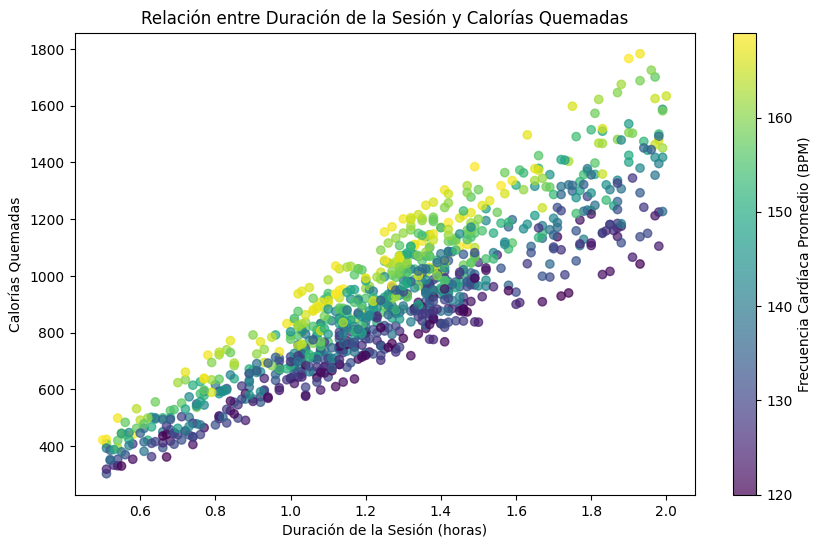

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.scatter(df['Session_Duration (hours)'], df['Calories_Burned'], c=df['Avg_BPM'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Frecuencia Cardíaca Promedio (BPM)')
plt.title('Relación entre Duración de la Sesión y Calorías Quemadas')
plt.xlabel('Duración de la Sesión (horas)')
plt.ylabel('Calorías Quemadas')
plt.show()

inciso c)

Calories_Burned - Media: 905.4224049331963, Mediana: 893.0, Moda: 883.0
Session_Duration (hours) - Media: 1.2564234326824255, Mediana: 1.26, Moda: 1.03
Avg_BPM - Media: 143.76670092497432, Mediana: 143.0, Moda: 132


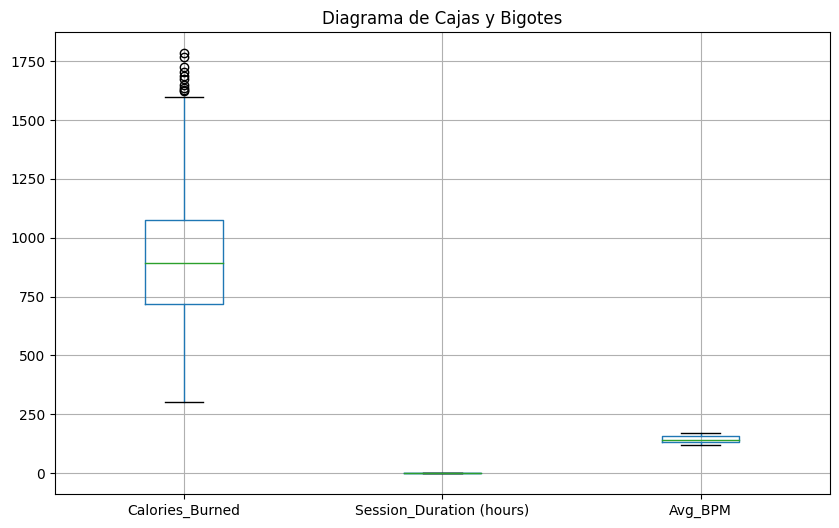

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar dataset
df = pd.read_csv("/content/Drive/MyDrive/datos/gym_members_exercise_tracking.csv")

# Seleccionar columnas
columnas = ['Calories_Burned', 'Session_Duration (hours)', 'Avg_BPM']

# Obtener media, mediana y moda
for columna in columnas:
    media = df[columna].mean()
    mediana = df[columna].median()
    moda = df[columna].mode()[0]
    print(f'{columna} - Media: {media}, Mediana: {mediana}, Moda: {moda}')

# Graficar diagrama de cajas y bigotes
plt.figure(figsize=(10,6))
df.boxplot(column=columnas)
plt.title('Diagrama de Cajas y Bigotes')
plt.show()

De calories_burned, La caja representa el rango intercuartílico, donde se agrupan el 50% central de los datos. La línea dentro de la caja es la mediana.  Los "bigotes" se extienden hasta los valores que no son considerados atípicos.

De Session_Duration (hours),La caja es muy estrecha, lo que indica que la mayoría de las sesiones son cortas. La mediana está en un valor bajo, lo que sugiere que la duración promedio de las sesiones es corta. Los bigotes son cortos, lo que sugiere que hay poca variabilidad en las duraciones de las sesiones, y no se observan valores atípicos significativos en esta columna.

De Avg_BPM,  La caja está relativamente baja y también presenta una mediana baja, lo que indica que la mayoría de los miembros tienen una frecuencia cardíaca promedio baja durante el ejercicio. No hay puntos atípicos visibles, lo que sugiere que los valores están bastante concentrados dentro del rango normal.
